### Visualización movilidad Madrid por zonas

In [1]:
# cargar datos

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('datoscompletospredMad08.csv')
df['FDIA']=pd.to_datetime(df['FDIA'])
df.set_index('FDIA',inplace=True)
df.head()


,total,zona 1,zona 2
FDIA,,,
2021-05-01,1357734,856206,165387
2021-05-02,1407784,851849,189825
2021-05-03,1247438,741302,173112
2021-05-04,2380662,1494990,327445
2021-05-05,2387795,1506466,315878


In [4]:
len(df)

123

In [5]:
# visualizamos los datos de previsión
dfreal = df.iloc[:92]
dfprev = df.iloc[92:]

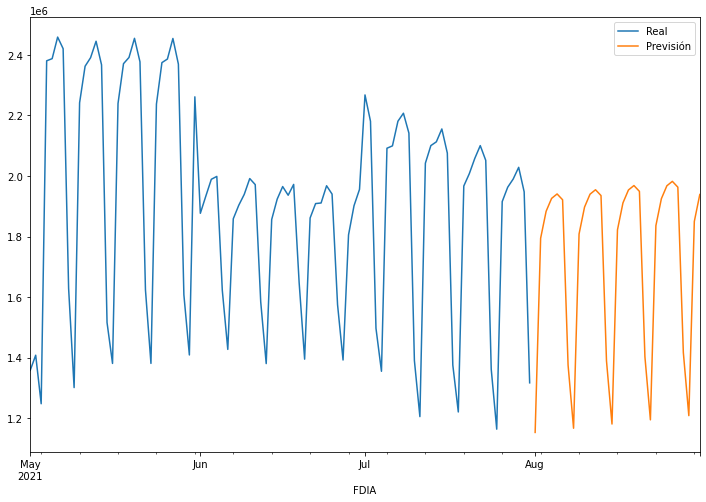

In [6]:
dfreal['total'].plot(legend=True,label='Real',figsize=(12,8))
dfprev['total'].plot(legend=True,label='Previsión')

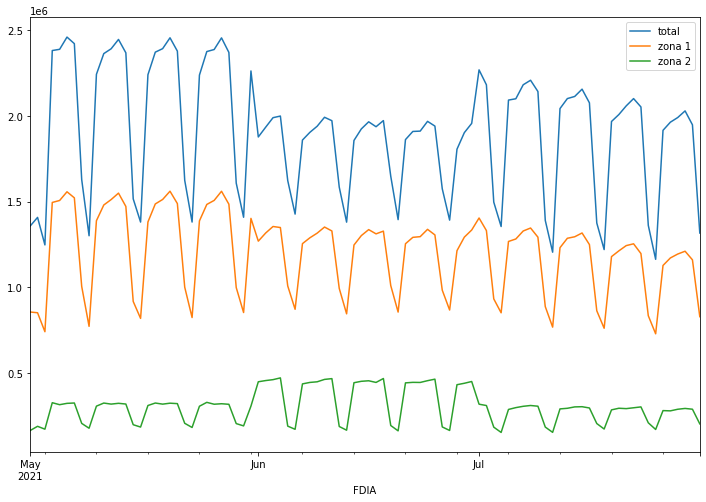

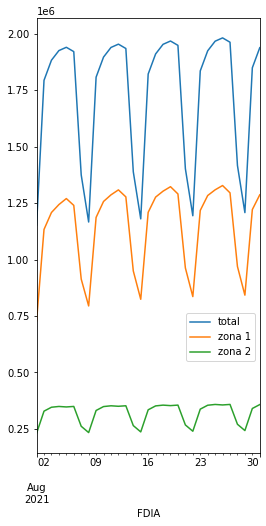

In [7]:
ax1 = dfreal.plot(legend=True,label='Real',figsize=(12,8))
ax2 = dfprev.plot(legend=True,label='Previsión',figsize=(4,8))
ax2.autoscale(axis='x',tight=True)
ax2.legend(loc=4, bbox_to_anchor=(1.0,0.2));

In [8]:
def descripcionDatosDataset(datos):
    print("Cantidad de filas:", datos.shape[0])
    print("Cantidad de columnas:", datos.shape[1])
    print('-'*100)
    for columna in datos.columns:
        valoresDescripcion = ''
        tipo = ''
        if datos[columna].dtype == 'float64' or datos[columna].dtype == 'int64':
            tipo = 'numérico'
            valoresDescripcion = datos[columna].agg(['min', 'max', 'mean', 'std', 'median'])
        else:
            tipo = 'nominal' #categórico | string | no-numérico
            valoresDescripcion = {'valoresPresentes' : datos[columna].unique(), 
                                  'cantidadNulos' : datos[columna].isna().sum()}
                                 #'conteoValores' : pd.value_counts(datos[columna])}
        print('Columna: ' + columna)
        print('Tipo de datos: ' + tipo)
        print('Descripción de valores:')
        if tipo == 'numérico':
            print(valoresDescripcion)
        else:
            print('-- Valores presentes (10 primeros): ' + str(valoresDescripcion['valoresPresentes'][:10]))
            pctNulos = (valoresDescripcion['cantidadNulos'] / datos.shape[0]) * 100
            print('-- Cantidad de nulos: ' + str(valoresDescripcion['cantidadNulos']) + ' = ' + "{0:.2f}".format(pctNulos) + '%')
        print('-'*100)

In [9]:
datos = dfreal
descripcionDatosDataset(datos)

Cantidad de filas: 92
Cantidad de columnas: 3
----------------------------------------------------------------------------------------------------
Columna: total
Tipo de datos: numérico
Descripción de valores:
min       1.163426e+06
max       2.459054e+06
mean      1.904307e+06
std       3.686973e+05
median    1.964003e+06
Name: total, dtype: float64
----------------------------------------------------------------------------------------------------
Columna: zona 1
Tipo de datos: numérico
Descripción de valores:
min       7.291990e+05
max       1.560482e+06
mean      1.201419e+06
std       2.406752e+05
median    1.275682e+06
Name: zona 1, dtype: float64
----------------------------------------------------------------------------------------------------
Columna: zona 2
Tipo de datos: numérico
Descripción de valores:
min       154135.000000
max       472086.000000
mean      304802.130435
std        99608.796918
median    306659.500000
Name: zona 2, dtype: float64
------------------------

In [10]:
datos = dfprev
descripcionDatosDataset(datos)

Cantidad de filas: 31
Cantidad de columnas: 3
----------------------------------------------------------------------------------------------------
Columna: total
Tipo de datos: numérico
Descripción de valores:
min       1.152637e+06
max       1.982337e+06
mean      1.727577e+06
std       3.030734e+05
median    1.897305e+06
Name: total, dtype: float64
----------------------------------------------------------------------------------------------------
Columna: zona 1
Tipo de datos: numérico
Descripción de valores:
min       7.281470e+05
max       1.328148e+06
mean      1.147803e+06
std       1.908808e+05
median    1.240170e+06
Name: zona 1, dtype: float64
----------------------------------------------------------------------------------------------------
Columna: zona 2
Tipo de datos: numérico
Descripción de valores:
min       230591.000000
max       358183.000000
mean      319732.612903
std        46948.205000
median    347060.000000
Name: zona 2, dtype: float64
------------------------

In [13]:
agosto = df.iloc[92:]

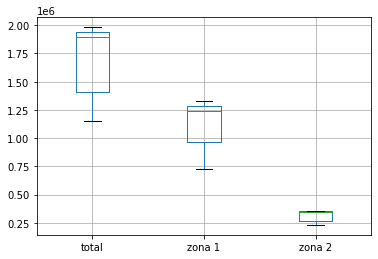

In [24]:
boxplot = agosto.boxplot(column=['total', 'zona 1', 'zona 2'])